# Exploration of Loan Data from Prosper
## by Kolawolé Ogounchi

## Investigation Overview
> This presentation is aimed to share our findings and conclusions based on the exploration of the Loan Data from the financial services company **Prosper**. 
.

## Dataset Overview

> The data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others, from which we have extracted the data referring to the subset of borrowers for which the company has to spend money in order to recover the money lent and we have analyzed **what might be the characteristics defining those borrowers?** and **what might be the reason(s) justifying their behaviours?** 

In [12]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# styling
from IPython.core.display import display, HTML, Markdown
display(HTML("""
<style>
div.output_png {
  display: flex;
  justify-content: center;
}
</style>
"""))

In [13]:
# load in the dataset into a pandas dataframe
df1 = pd.read_csv('~/Onedrive/DAN/project7/project/final/df1.csv')

In [14]:
df1.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
df1.head()

,Term,LoanStatus,BorrowerRate,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,TotalCreditLinespast7years,...,DelinquenciesLast7Years,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,LP_CollectionFees,Recommendations,InvestmentFromFriendsCount,CreditScore
0,36,Completed,0.1450,Missing,Missing,Missing,False,680.0,699.0,6.0,...,0.0,0.06,True,9583.333333,10000,57.64,-299.78,0,0,689.5
1,36,Current,0.1870,IL,Retail Management,Employed,False,680.0,699.0,19.0,...,0.0,0.37,True,4734.333333,15000,547.57,-93.09,0,0,689.5
2,36,Chargedoff,0.2300,CA,Other,Full-time,False,600.0,619.0,24.0,...,0.0,0.59,True,3891.666667,23500,909.68,-523.49,0,0,609.5
3,36,Completed,0.1500,NE,Other,Not employed,False,620.0,639.0,14.0,...,12.0,0.20,True,860.000000,1000,0.00,-33.29,0,0,629.5
4,36,Chargedoff,0.3177,AL,Social Worker,Employed,True,740.0,759.0,30.0,...,0.0,0.45,True,2583.333333,4000,173.71,-147.65,0,0,749.5


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7394 entries, 0 to 7393
Data columns (total 21 columns):
Term                          7394 non-null int64
LoanStatus                    7394 non-null object
BorrowerRate                  7394 non-null float64
BorrowerState                 7394 non-null object
Occupation                    7394 non-null object
EmploymentStatus              7394 non-null object
IsBorrowerHomeowner           7394 non-null bool
CreditScoreRangeLower         7394 non-null float64
CreditScoreRangeUpper         7394 non-null float64
TotalCreditLinespast7years    7394 non-null float64
CurrentDelinquencies          7394 non-null float64
DelinquenciesLast7Years       7394 non-null float64
DebtToIncomeRatio             7394 non-null float64
IncomeVerifiable              7394 non-null bool
StatedMonthlyIncome           7394 non-null float64
LoanOriginalAmount            7394 non-null int64
MonthlyLoanPayment            7394 non-null float64
LP_CollectionFees      

## Occupations

> Our population of study is the borrowers whom collection fees are more than 0. We notice that the three major occupational categories in that population are: **Professionals**, **Administrative assistants**, and **Teachers**. 

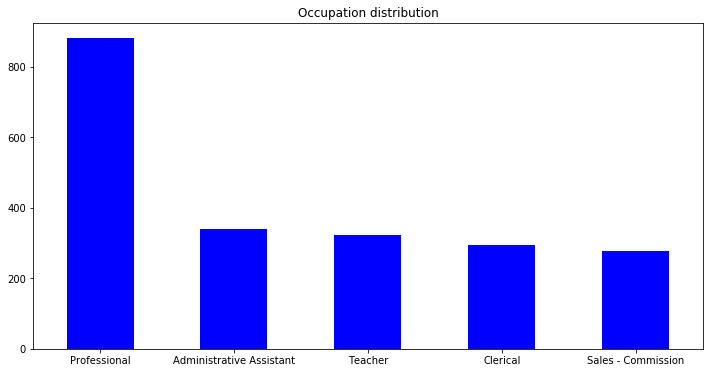

In [17]:
df1['Occupation'][df1.Occupation != 'Other'].value_counts()[:5].plot(kind='bar', figsize=(12,6), colors='b');
plt.xticks(rotation=0)
plt.title('Occupation distribution');

## Emploment status

> Below we can see the distribution of **Employment Status** for the subset of our population of study that holds the occupations shown in the previous visualization and the take away is that for the majority they are working **Full-time** or are **Employed**.  

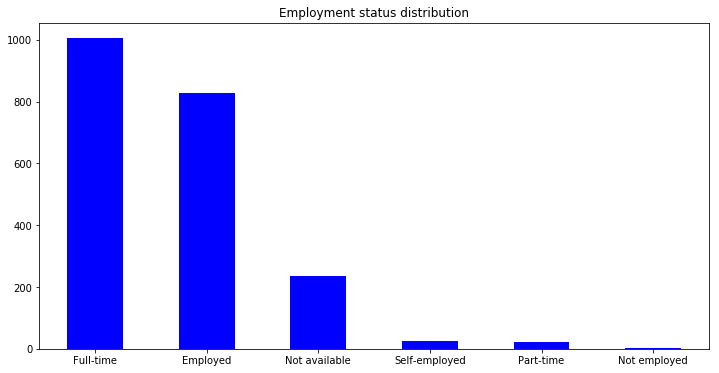

In [18]:
df1.query("Occupation == ['Professional','Administrative Assistant', \
          'Teacher', 'Clerical', 'Sales - Commission']") \
['EmploymentStatus'].value_counts().plot(kind='bar', colors='b', figsize=(12,6))
plt.xticks(rotation=0)
plt.title('Employment status distribution');

## Debt-to-Income ratio
>On top of everything we have seen above, the majority of our population of study have an above average debt-to-income ratio, which means making the monthly payment is not something that should have put a stress on their finances.  

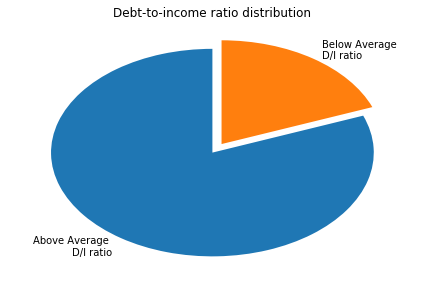

In [19]:
good_ratio = sum(df1.query("DebtToIncomeRatio <= 0.36")['DebtToIncomeRatio'].value_counts())
bad_ratio = sum(df1.query("DebtToIncomeRatio > 0.36")['DebtToIncomeRatio'].value_counts())

sizes = [good_ratio, bad_ratio]
labels = ['Above Average \nD/I ratio', 'Below Average \nD/I ratio']
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, startangle=90, explode=explode)
plt.tight_layout()
plt.title('Debt-to-income ratio distribution')
plt.show()

## Credit score
>Why is it costly to the company to collect the money back from those borrowers while most of them have pretty stable occupations and employment status, as well as enough room in their income to pay back the loan. The visualization below shows that most of them have a below average credit score, which means most of them have a history of not making their payment on time. The take away is that these borrowers behaviour is motivated by bad habit in the management of personal finances or just out of bad will.   

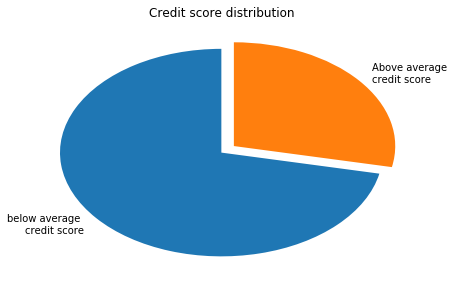

In [20]:
bad_credit = sum(df1.query("CreditScore < 700")['CreditScore'].value_counts())
good_credit = sum(df1.query("CreditScore >= 700")['CreditScore'].value_counts())

sizes = [bad_credit, good_credit]
labels = ['below average \ncredit score', 'Above average \ncredit score']
explode = (0, 0.1)
plt.pie(sizes, labels=labels, startangle=90, explode=explode)
plt.tight_layout()
plt.title('Credit score distribution')
plt.show()

>Our argument is supported by the following visualization which shows that our population of study is clustered just above 0 as debt-to-income ratio, which means the majority of them could definetly afford the payment, and adding more to that, the highest collection fees occur for a borrowers with debt-to-income ratio just a bit above 0. 

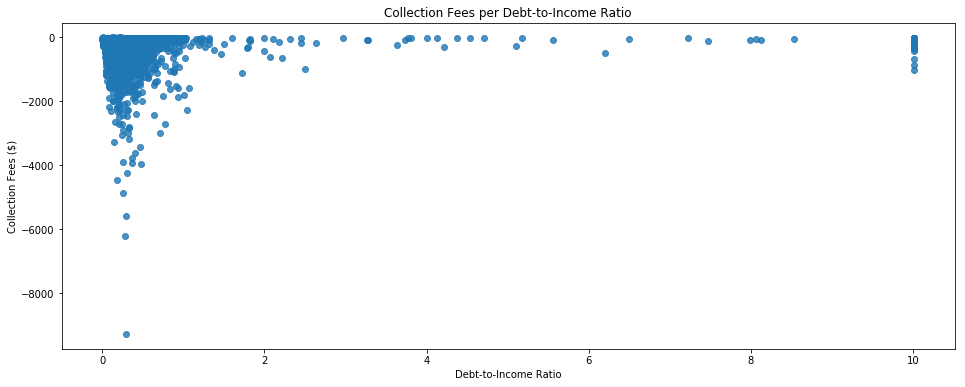

In [21]:
debtToIncome = df1.DebtToIncomeRatio
collectionFees = df1.LP_CollectionFees
plt.figure(figsize=(16,6))
g = sb.regplot(x=debtToIncome, y=collectionFees, fit_reg=False)
# Set axes labels and title
g.set(xlabel='Debt-to-Income Ratio', ylabel='Collection Fees ($)',
   title ='Collection Fees per Debt-to-Income Ratio' );

>Something we could also point out based on the next visualization is that some of the highest collection fees happen with borrowers that even have above average credit scores but those are isolated cases, which means that the company is already doing a very good job selecting people who loan requests will be approved. 

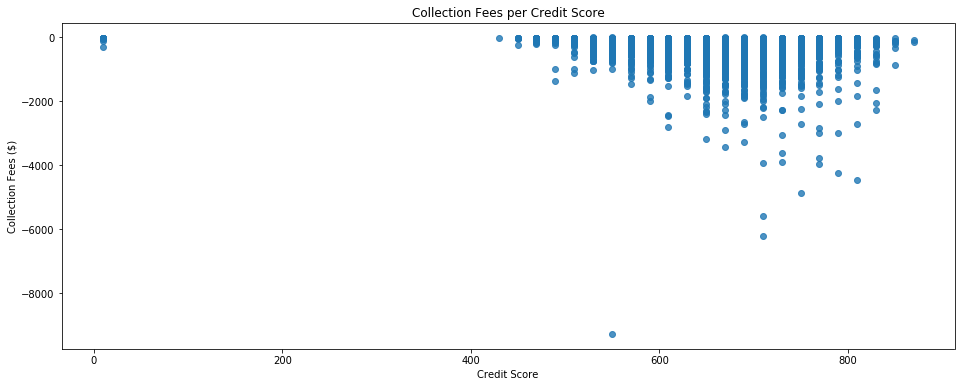

In [22]:
creditScore = df1.CreditScore
collectionFees = df1.LP_CollectionFees
plt.figure(figsize=(16,6))
g = sb.regplot(x=creditScore, y=collectionFees, fit_reg=False)
g.set(xlabel='Credit Score', ylabel='Collection Fees ($)',
   title ='Collection Fees per Credit Score' );

### Conclusion
>Many people may have bad financial behaviours just out of negligence or bad will. Therefore Prosper could fix that by creating incentives for borrowers to payback their debts quickly and on time. And even put some strategies in place in order to provide a bit of financial education to their borrowers, which may end up being a strategical advantage in customer acquisition as it will make them look like a company who cares for their customers.   

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

# THANK YOU FOR YOUR ATTENTION!